In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,LSTM,Dropout,Conv2D,BatchNormalization,Flatten,Bidirectional,Reshape,GRU
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv("/content/iitk.csv")
data.head(10)

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet
5,Minor injury,15,20,49,Female,Car,3,3.387430,Rural,Yes,Rear-end,Yes,117,Dry
6,Minor injury,62,6,70,Male,Car,1,3.464110,Urban,No,Head-on,Yes,55,Dry
7,Minor injury,96,17,69,Male,Car,2,3.199897,Rural,Yes,Head-on,Yes,117,Icy
8,Minor injury,85,8,40,Female,Car,2,3.333741,Rural,No,Head-on,Yes,97,Icy
9,Minor injury,120,21,18,Female,Car,1,3.113678,Urban,No,Rear-end,No,100,Dry


In [ ]:
print(data.columns)
print(data.dtypes)
datay=data["Crash_Severity"]
data=data.drop("Crash_Severity",axis=1)

Index(['Crash_Severity', 'Vehicle_Speed', 'Crash_Time', 'Age', 'Gender',
       'Vehicle_Type', 'Number_of_Lanes', 'Lane_Width', 'Road_Type',
       'Alcohol_Consumption', 'Crash_Type', 'Seatbelt_Usage', 'Speed_Limit',
       'Road_Surface_Condition'],
      dtype='object')
Crash_Severity             object
Vehicle_Speed               int64
Crash_Time                  int64
Age                         int64
Gender                     object
Vehicle_Type               object
Number_of_Lanes             int64
Lane_Width                float64
Road_Type                  object
Alcohol_Consumption        object
Crash_Type                 object
Seatbelt_Usage             object
Speed_Limit                 int64
Road_Surface_Condition     object
dtype: object


In [ ]:
hottie = LabelEncoder()
encoding_data=data.select_dtypes(include="object").columns.to_list()


print(len(encoding_data))


#label encoding for numerical convertion
for i in encoding_data:
  data[i]=hottie.fit_transform(data[i])


data.info()

7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_Speed           300 non-null    int64  
 1   Crash_Time              300 non-null    int64  
 2   Age                     300 non-null    int64  
 3   Gender                  300 non-null    int64  
 4   Vehicle_Type            300 non-null    int64  
 5   Number_of_Lanes         300 non-null    int64  
 6   Lane_Width              300 non-null    float64
 7   Road_Type               300 non-null    int64  
 8   Alcohol_Consumption     300 non-null    int64  
 9   Crash_Type              300 non-null    int64  
 10  Seatbelt_Usage          300 non-null    int64  
 11  Speed_Limit             300 non-null    int64  
 12  Road_Surface_Condition  300 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.6 KB


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,datay)
y_train.head()

,Crash_Severity
186,Major injury
125,Major injury
71,Minor injury
74,Minor injury
206,Fatal crash


In [ ]:
# Correct the column name and use the correct attribute to get unique values
datay.value_counts()

,count
Crash_Severity,
Minor injury,100
Major injury,100
Fatal crash,100


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 13)
(75, 13)
(225,)
(75,)


In [ ]:
scale=StandardScaler()

x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 13, 1)
(75, 13, 1)
(225,)
(75,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
hot_mama=OneHotEncoder()
y_train=hot_mama.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test=hot_mama.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

'''from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)'''

'from sklearn.preprocessing import LabelEncoder\nfrom tensorflow.keras.utils import to_categorical\n\nencoder=LabelEncoder()\ny_train=encoder.fit_transform(y_train)\ny_test=encoder.fit_transform(y_test)\n\ny_train=to_categorical(y_train)\ny_test=to_categorical(y_test)'

In [ ]:
def normie():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(len(datay.unique()), activation='softmax') # Output layer with softmax for multi-class classification
    ])

"model = keras.Sequential([\n    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),\n    layers.BatchNormalization(),\n    layers.Dropout(0.3),\n    layers.Dense(64, activation='relu'),\n    layers.BatchNormalization(),\n    layers.Dropout(0.3),\n    layers.Dense(32, activation='relu'),\n    layers.Dense(len(datay.unique()), activation='softmax') # Output layer with softmax for multi-class classification\n])"

In [ ]:
def cnn_model():
    model = Sequential(
        [
            Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=(x_train.shape[1],1,1), padding="same"),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            Flatten(),
            Dense(64, activation="relu"),
            Dense(32, activation="relu"),
            Dense(3, activation="softmax"),
        ]
    )
    return model

In [ ]:
def gru_model():
  model = Sequential([
      GRU(128, activation="relu", input_shape=(10, 1), return_sequences=True),
      GRU(64, activation="relu", return_sequences=True),
      BatchNormalization(),
      GRU(32, activation="relu", return_sequences=False),
      BatchNormalization(),
      Dense(16, activation="relu"),
      Dense(3, activation="softmax")
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def model_lstm():
    model = Sequential([
        LSTM(128, activation="relu", input_shape=(10, 1), return_sequences=True),
        LSTM(64, activation="relu", return_sequences=True),
        BatchNormalization(),
        LSTM(32, activation="relu", return_sequences=False),
        BatchNormalization(),
        Dense(16, activation="relu"),
        Dense(3, activation="softmax")
    ])

    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def model_bi():
      model = Sequential()

      # First BiLSTM layer (return_sequences=True for stacking multiple layers)
      model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(10, 1)))
      model.add(Dropout(0.3))

      # Second BiLSTM layer (return_sequences=True to pass the sequence to the next layer)
      model.add(Bidirectional(LSTM(64, return_sequences=True)))
      model.add(Dropout(0.3))

      # Final BiLSTM layer (return_sequences=False to output final sequence representation)
      model.add(Bidirectional(LSTM(64, return_sequences=False)))
      model.add(Dropout(0.3))

      model.add(Dense(64, activation="relu"))

      model.add(Dense(3, activation="softmax"))
      return model


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Reshape, LSTM, Flatten, Dense

def cnn_lstm():
      model = Sequential(
          [
              Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=(x_train.shape[1], 1, 1), padding="same"),
              BatchNormalization(),
              Reshape((x_train.shape[1], 128)),  # Reshaping based on the correct dimensions
              LSTM(128, activation="relu", return_sequences=True),  # LSTM layers, ensure return_sequences=True if followed by another LSTM
              BatchNormalization(),
              LSTM(64, activation="relu", return_sequences=True),  # Ensure return_sequences=True if followed by another LSTM
              BatchNormalization(),
              LSTM(32, activation="relu"),
              BatchNormalization(),
              Flatten(),
              Dense(16, activation="relu"),
              Dense(3)  # Output layer
          ]
      )
      return model


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class neuralnetwork(nn.Module):
  def __init__(self):
    super(neuralnetwork,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(100000,10000),
        nn.ReLU(),
        nn.Linear(10000,1)
    )
  def forward(self,x):
    return self.model(x)

model = neuralnetwork()
optimizer = optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.MSELoss()




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Flatten the 28x28 input images to a vector of size 784
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # Output layer for 10 classes
        )

    def forward(self, x):
        return self.model(x)

# Load MNIST dataset
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, optimizer, and loss function
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()  # Suitable for classification tasks

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for batch_idx, (batch_x, batch_y) in enumerate(train_loader):
        optimizer.zero_grad()

        # Forward pass
        predictions = model(batch_x)

        # Compute loss
        loss = loss_fn(predictions, batch_y)

        # Backward pass and update
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()  # Set model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += batch_y.size(0)l
        correct += (predicted == batch_y).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.59MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.9MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5, Loss: 0.3750
Epoch 2/5, Loss: 0.1914
Epoch 3/5, Loss: 0.1425
Epoch 4/5, Loss: 0.1146
Epoch 5/5, Loss: 0.0970
Test Accuracy: 96.98%


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3333 - loss: 6.3186 - val_accuracy: 0.2667 - val_loss: 6.0174
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3574 - loss: 5.4295 - val_accuracy: 0.2667 - val_loss: 6.0174
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3917 - loss: 4.9836 - val_accuracy: 0.2667 - val_loss: 6.0174
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4515 - loss: 5.7484 - val_accuracy: 0.2667 - val_loss: 6.0174
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3513 - loss: 4.4177 - val_accuracy: 0.2667 - val_loss: 6.0174
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3661 - loss: 4.9376 - val_accuracy: 0.2667 - val_loss: 6.0174
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4271 - loss: 5.9056 - val_accuracy: 0.2667 - val_loss: 6.0174
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3769 - loss: 5.0288 - val_accuracy: 0.2667 - val_loss: 6.0174
E

In [ ]:
model.save("hello.h5")

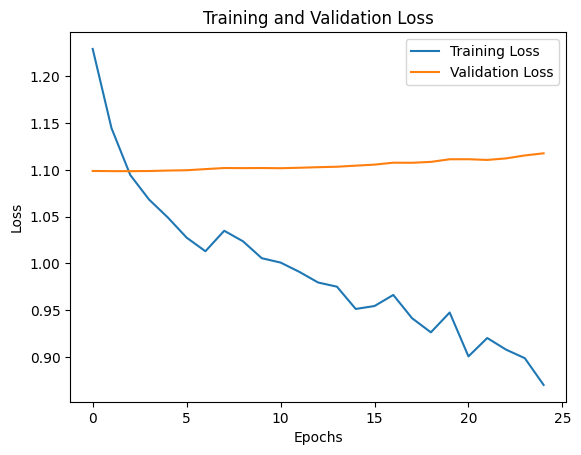

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(model.history.history["loss"], label="Training Loss")  # x-axis is implicitly the epoch
plt.plot(model.history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()